# WeRateDogs Twitter Analysis Project

## Introduction

The goal of the project is to analyze a famous Twitter account - WeRateDogs that rates people’s dogs with a humorous comment about the dogs by gathering data from Twitter, wrangling data, analyzing, and finally visualizing data to show insights and create a comprehensive and trustworthy report. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import requests
import tweepy
import json
import csv
import sys
import time
import warnings

## Analyzing and Visualizing Data

In [90]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1284.000000,1284.0,1284.000000,1284.000000,1.284000e+03,1.284000e+03,1284.000000,1284.000000
mean,12.177196,10.0,1.185358,0.587786,1.373044e-01,6.131988e-02,8242.556075,2494.037383
std,50.615360,0.0,0.538382,0.273605,1.022429e-01,5.203010e-02,11503.637331,4023.236033
min,1.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,80.000000,12.000000
25%,10.000000,10.0,1.000000,0.354800,5.419487e-02,1.646350e-02,1685.750000,571.250000
50%,11.000000,10.0,1.000000,0.579762,1.203515e-01,4.938480e-02,3783.000000,1241.500000
75%,12.000000,10.0,1.000000,0.838215,1.994975e-01,9.465185e-02,10161.250000,2960.750000
max,1776.000000,10.0,4.000000,1.000000,4.676780e-01,2.710420e-01,127540.000000,61257.000000


In [91]:
twitter_archive_master['p2_conf'].mean(),twitter_archive_master['p3_conf'].mean()

(0.13730438335289175, 0.061319880898938486)

According to the above summary, we can get some information:<br>
The mean of rating is 12.23/10 and a outliner is 1776/10, which needs to review respectively.<br>
The mean of favorite count of tweets is 8,243 and the maximum is 127,536.<br>
The mean of retweet count of tweets is 2,494 and the maximum is 61,267.<br>
The p1_dog has the highest average prediction score 0.588.<br>

<br>
Questions to be answered:<br>
1. Which gender tweet most on this account?<br>
2. What is the distribution of the stage of dogs?<br>
3. Which channels do users come from, acccording to the tweet sources? <br>
4. Is the one who has the max fav count correspondent to the one who has max retweet count? Is there any correlation between favorite and retweet?<br>
5. What is the relationship between rating and other factors, e.g. favorite, retweet? <br>
6. Which time, day, and month the users tweet, retweet and favorite most?<br> 
7. The pattern of rating over time
8. Who are those who have higher rating? Why would they get the higher rating?<br>
9. Who got the lower rating? Why?<br>
10. What are the top 5 popular breeds of dog? How are their ratings and retweet/favorite counts?<br>



####  Which gender tweet most on this account?

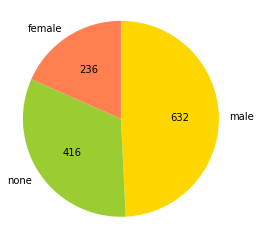

In [92]:
gender_count = twitter_archive_master['gender'].value_counts()
size = np.array(gender_count)
colors = ['gold', 'yellowgreen', 'coral', 'blue']

p, tx, autotexts = plt.pie(gender_count, labels = gender_count.index, startangle = 90, 
                           counterclock = False, autopct = "", colors = colors)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(size[i]))
    
plt.axis('square');

`Note: More tweets about male dogs (632) tweet on this account than female dogs.`

#### What is the distribution of the stage of dogs?

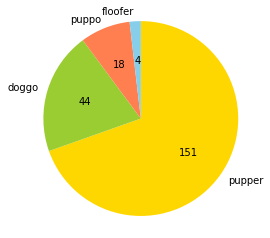

In [93]:
dog_stage_count = twitter_archive_master['dog_stage'].value_counts()
size = np.array(dog_stage_count)
colors = ['gold', 'yellowgreen', 'coral', 'skyblue']

p, tx, autotexts = plt.pie(dog_stage_count, labels = dog_stage_count.index, startangle = 90, 
                           counterclock = False, autopct = "", colors = colors)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(size[i]))
    
plt.axis('square');

`Note: There are the greatest tweet number about pupper on the acconut, which is 151.`

#### Which channels do users come from, acccording to the tweet sources? 

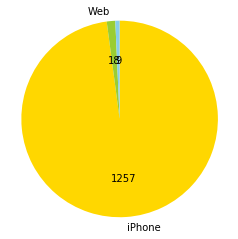

In [187]:
source_count = twitter_archive_master['source'].value_counts()
size = np.array(source_count)
colors = ['gold', 'yellowgreen', 'skyblue']
labels = ['iPhone', 'Web', '']

p, tx, autotexts = plt.pie(source_count, labels = labels, startangle = 90,
                           counterclock = False, autopct = "", colors = colors)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(size[i]))

plt.axis('square');

`Most tweets are from iphone.`

#### Which time, day, month, and year do the users tweet most?

In [95]:
twitter_archive_master.groupby('year').favorite_count.count()

year
2015    443
2016    639
2017    202
Name: favorite_count, dtype: int64

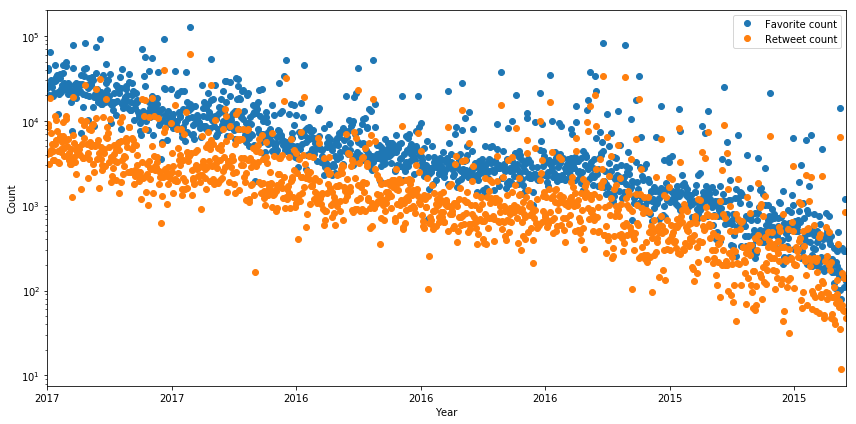

In [221]:
year_df = twitter_archive_master.set_index('year')
year_df['favorite_count'].plot(style='o', figsize=(12,6), label='Favorite count');
year_df.retweet_count.plot(style='o',label='Retweet count')
plt.legend()
plt.yscale("log")
plt.xlabel("Year");plt.ylabel("Count");
plt.tight_layout()

`The favorite and retweet counts somehow represents user's active rate, and hence, based on the above year plot, it shows that the users' active increases over year, though there are several high favorite counts in the previous year.`

In [225]:
#month
month_tw = twitter_archive_master.groupby('month')[['tweet_id']].count()
month_orders = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_tw = month_tw.reindex(month_orders)

In [224]:
#day
day_tw = twitter_archive_master.groupby('day')[['tweet_id']].count()
day_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_tw = day_tw.reindex(day_index)

In [226]:
#time
twitter_archive_master['time'] = twitter_archive_master['timestamp'].apply(lambda t : t.strftime('%H'))
time_tw = twitter_archive_master.groupby('time')[['tweet_id']].count()

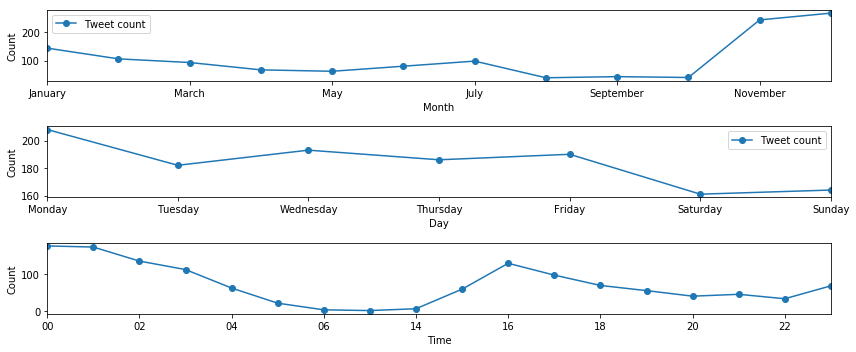

In [229]:
plt.figure(figsize=[12,60])

plt.subplot(3,1,1)
month_tw.tweet_id.plot(style='o-', figsize=(16,5), label='Tweet count')
plt.legend()
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()

plt.subplot(3,1,2)
day_tw.tweet_id.plot(style='o-', figsize=(12,5), label='Tweet count');
plt.legend()
plt.xlabel("Day")
plt.ylabel("Count")
plt.tight_layout()

plt.subplot(3,1,3)
time_tw.tweet_id.plot(style='o-', figsize=(12,5), label='Tweet count')
plt.xlabel("Time")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("favorite_Retweet_count.png");

`People tend to react actively on this account during holidays (e.g. Thanksgiving, Xmas), from November to January.`
`In addition to month aspect, it seems that people are more active on the account on Monday.`<br>
`The most active time period is at 12 am, or 16 pm.`

#### Is the one who has the max fav count correspondent to the one who has max retweet count? Is there any correlation between favorite and retweet count?

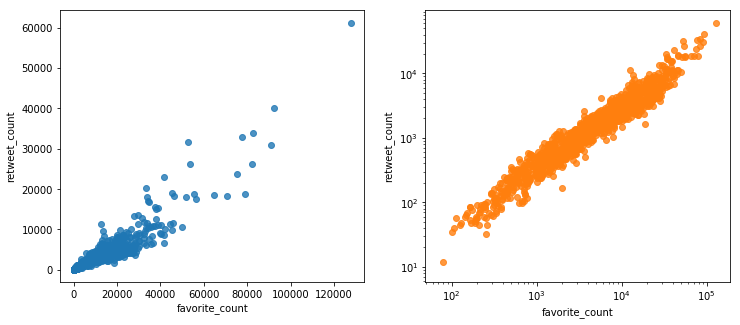

In [94]:
fig = plt.figure(figsize = [12,5]);   
ax1 = fig.add_subplot(121);  
ax2 = fig.add_subplot(122);

sns.regplot(x="favorite_count", y="retweet_count", data=twitter_archive_master, fit_reg=False, ax=ax1)
sns.regplot(x="favorite_count", y="retweet_count", data=twitter_archive_master, fit_reg=False, ax = ax2)
plt.xscale('log')
plt.yscale('log');

`According to the above plot, the favorite count and retweet count have highlly postive correlation. It means that the tweets with the higher favorite counts tend to have higher retweet counts, too.`

#### There are two outliners of rating point, so look deeper to find out the reason.

In [251]:
twitter_archive_master[twitter_archive_master['rating_numerator'] > 50]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,gender,dog_stage,year,month,date,day,time
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus He's quite simply America af 1...,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,male,None,2016,July,07-04,Monday,15:00
2074,670842764863651840,2015-11-29 05:52:33,iPhone,After so many requests here you go\n\nGood dog...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,none,None,2015,November,11-29,Sunday,05:52


`It found out that the highest rating tweet posted on National Day, 7/4, and the dog in the tweet is also related to it, so it wins users' attentions.(See the example as below)`<br>
`The other tweet with second high rating is about one of the most famous celebrity in US who named dogg, rather than real dog. Due to the creativity of this tweet, it also wins the like from users.`

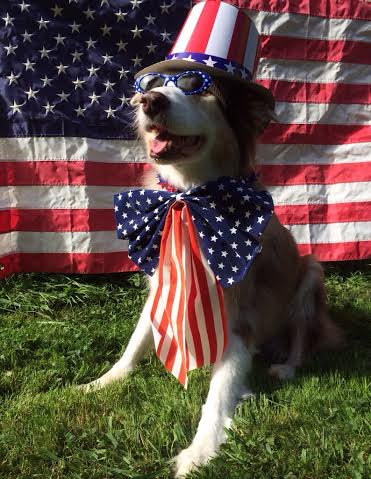

#### What is the relationship between rating and other factors, e.g. favorite, retweet?

In [261]:
#remove the outliners and check the relationship between rating and other factors
rate_df = twitter_archive_master[twitter_archive_master['rating_numerator'] < 50]

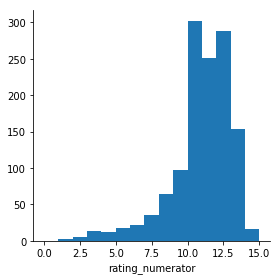

In [262]:
bin_edges = np.arange(0, 15+0.1, 1)
g = sns.FacetGrid(data = rate_df, size = 4)
g.map(plt.hist, "rating_numerator", bins = bin_edges);

`Most of tweets got the rating at 10-13.`

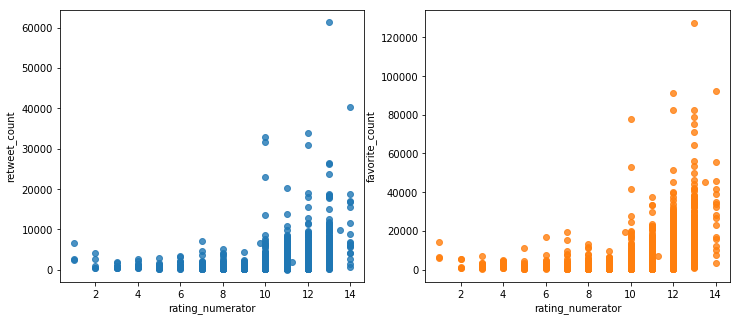

In [310]:
fig = plt.figure(figsize = [12,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.regplot(x = "rating_numerator", y = "retweet_count", data = rate_df, fit_reg = False, ax = ax1)
sns.regplot(x = "rating_numerator", y = "favorite_count", data = rate_df, fit_reg = False, ax = ax2);

`The higher rating tends to have the more retweet and like, but the highest rating is not the tweet with the highest retweet or like is not necessary. There is no exact positive or negative correlation.`

#### The pattern of rating over time 

In [349]:
month_rate = rate_df.groupby('month').rating_numerator.mean()
month_rate = month_rate.reindex(month_orders)

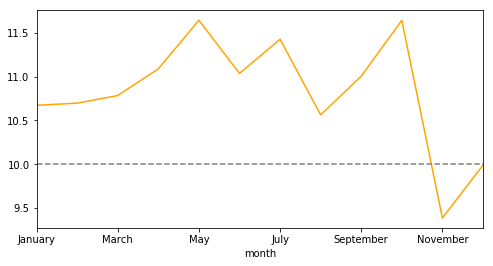

In [363]:
plt.figure(figsize = [8,4])
month_rate.plot( color = 'orange')
plt.axhline(y=10.0, color='gray', linestyle='--');

`Surprisingly, the average rating of tweets on November is the lowest because all the tweets with the lowest rating are on November.`

#### Who got the lower rating? Why? 

In [360]:
#figure out why the tweet are underrated
rate_df[rate_df.rating_numerator == 1].text.values

array([ "What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://tco/RDXCfk8hK0",
       'Never seen dog like this Breathes heavy Tilts head in a pattern No bark Shitty at fetch Not even cordless 1/10 https://tco/i9iSGNn3fx',
       "Not familiar with this breed No tail (weird) Only 2 legs Doesn't bark Surprisingly quick Shits eggs 1/10 https://tco/Asgdc6kuLX"], dtype=object)

`The tweets with lowest rating are because the tweet is not related to dog at all.(See the example as belowe)`
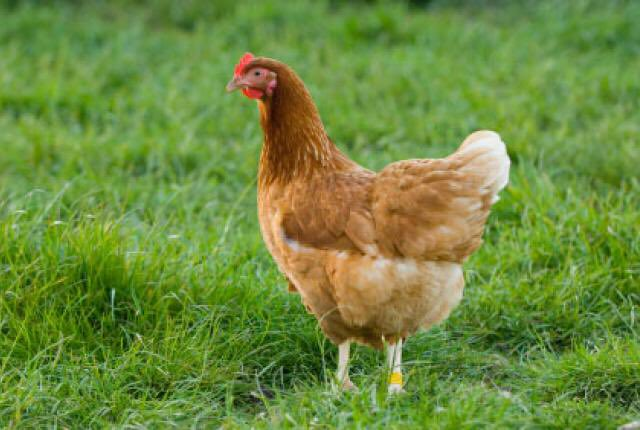

#### What are the top 5 popular breeds of dog? How are their ratings and retweet/favorite counts?

In [373]:
rate_df.p1.value_counts().head()

golden_retriever      93
Pembroke              65
Labrador_retriever    62
Chihuahua             45
pug                   39
Name: p1, dtype: int64

In [375]:
breed_df = rate_df.query('p1 == ["golden_retriever","Pembroke","Labrador_retriever","Chihuahua","pug"]')

In [435]:
breed_df.groupby(['p1','gender']).tweet_id.count()

p1                  gender
Chihuahua           female     6
                    male      25
                    none      14
Labrador_retriever  female    14
                    male      24
                    none      24
Pembroke            female    10
                    male      32
                    none      23
golden_retriever    female    30
                    male      36
                    none      27
pug                 female     5
                    male      24
                    none      10
Name: tweet_id, dtype: int64

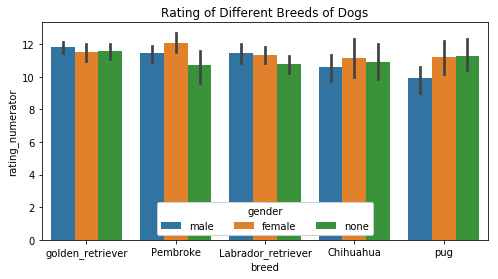

In [425]:
breed_order = ["golden_retriever","Pembroke","Labrador_retriever","Chihuahua","pug"]
plt.figure(figsize = [8,4])
ax = sns.barplot(data = breed_df, x = 'p1', y = 'rating_numerator', hue = 'gender', order = breed_order)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
plt.xlabel('breed')
plt.title('Rating of Different Breeds of Dogs');

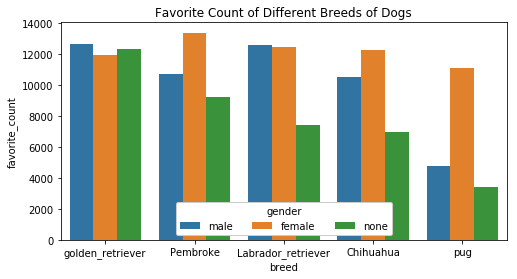

In [423]:
breed_order = ["golden_retriever","Pembroke","Labrador_retriever","Chihuahua","pug"]
plt.figure(figsize = [8,4])
ax = sns.barplot(data = breed_df, x = 'p1', y = 'favorite_count', hue = 'gender', order = breed_order, ci=None)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
plt.xlabel('breed')
plt.title('Favorite Count of Different Breeds of Dogs');

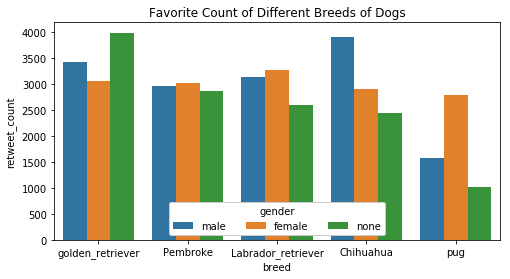

In [426]:
breed_order = ["golden_retriever","Pembroke","Labrador_retriever","Chihuahua","pug"]
plt.figure(figsize = [8,4])
ax = sns.barplot(data = breed_df, x = 'p1', y = 'retweet_count', hue = 'gender', order = breed_order, ci=None)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
plt.xlabel('breed')
plt.title('Favorite Count of Different Breeds of Dogs');

`The top 5 breeds of dog with higher tweets are Golden_retriever, Pembroke, Labrador_retriever, Chihuahua, Pug. They are all male dogs more than female dogs, but there are nearly equal number of female and male of golden retriever.`<br>
    `The first popular breed, golden retriever, tends to have higher favorite and retweet count, but female pembroke has the most favorite counts among female dogs and male chihuahua also has the most retweet counts among male dogs.`


## Conclusion
`Based on the user behaviors in the above result, tweet content, tweet time, and dog breeds are the primary factors to get more attentions. For instance, a tweet with the words and image about male golden retriever dogs related to the specific holiday, such as National Day or Christmas, at midnight on Monday on November or December is more likely to get more attentions and more retweet and like from users on Twitter. `